In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Reading the NBA stats from the CSV files
nba_stats = pd.read_csv('regular_season.csv')
nba_team_stats = pd.read_csv('Team Performance.csv')

In [3]:
# Cleaning the dataset
nba_stats.drop(columns="Rk", inplace=True)
nba_stats.fillna({'FG%': 0, '3P%': 0, '2P%': 0, 'FT%': 0, 'eFG%': 0}, inplace=True)

In [4]:
# Returning the first 10 rows of the NBA Player stats
nba_stats.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,0.525,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
5,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,0.426,...,0.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
6,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,0.391,...,0.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
7,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,...,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
8,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,...,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
9,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,0.499,...,0.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5


In [5]:
# Returning the first 10 rows of the NBA Team stats
nba_team_stats.head(10)

,Tm,Wins,Losses,Coast,Full Team Name
0,PHO,49,33,West,Phoenix Suns
1,NYK,50,32,East,New York Knicks
2,WAS,15,67,East,Washington Wizards
3,MIL,49,33,East,Milwaukee Bucks
4,ORL,47,35,East,Orlando Magic
5,TOR,25,57,East,Toronto Raptors
6,MEM,27,55,West,Memphis Grizzlies
7,BOS,64,18,East,Boston Celtics
8,SAS,22,60,West,San Antonio Spurs
9,SAC,46,36,West,Sacramento Kings


In [6]:
# Data types of all columns
nba_stats.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [7]:
nba_team_stats.dtypes

Tm                object
Wins               int64
Losses             int64
Coast             object
Full Team Name    object
dtype: object

In [8]:
eastern_teams = nba_team_stats[nba_team_stats['Coast'] == 'East']
western_teams = nba_team_stats[nba_team_stats['Coast'] == 'West']

eastern_teams_sorted = eastern_teams.sort_values(by='Wins', ascending=False)
western_teams_sorted = western_teams.sort_values(by='Wins', ascending=False)

east_table = tabulate(eastern_teams_sorted[['Full Team Name', 'Wins', 'Losses']], headers='keys', tablefmt='pretty')
print("Eastern Conference Table (2023/2024 Regular Season)")
print(east_table)
print("")

west_table = tabulate(western_teams_sorted[['Full Team Name', 'Wins', 'Losses']], headers='keys', tablefmt='pretty')
print("Western Conference Table (2023/2024 Regular Season)")
print(west_table)

Eastern Conference Table (2023/2024 Regular Season)
+----+---------------------+------+--------+
|    |   Full Team Name    | Wins | Losses |
+----+---------------------+------+--------+
| 7  |   Boston Celtics    |  64  |   18   |
| 1  |   New York Knicks   |  50  |   32   |
| 3  |   Milwaukee Bucks   |  49  |   33   |
| 24 | Cleveland Cavaliers |  48  |   34   |
| 4  |    Orlando Magic    |  47  |   35   |
| 14 | Indianapolis Pacers |  47  |   35   |
| 22 | Philadelphia 76ers  |  47  |   35   |
| 13 |     Miami Heat      |  46  |   36   |
| 15 |    Chicago Bulls    |  39  |   43   |
| 10 |    Atlanta Hawks    |  36  |   46   |
| 12 |    Brooklyn Nets    |  32  |   50   |
| 5  |   Toronto Raptors   |  25  |   57   |
| 25 |  Charlotte Hornets  |  21  |   61   |
| 2  | Washington Wizards  |  15  |   67   |
| 20 |   Detroit Pistons   |  14  |   68   |
+----+---------------------+------+--------+

Western Conference Table (2023/2024 Regular Season)
+----+------------------------+------+--

C:\Users\wills\AppData\Local\Temp\ipykernel_229916\3164449622.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=average_points, palette=colors, edgecolor='white')


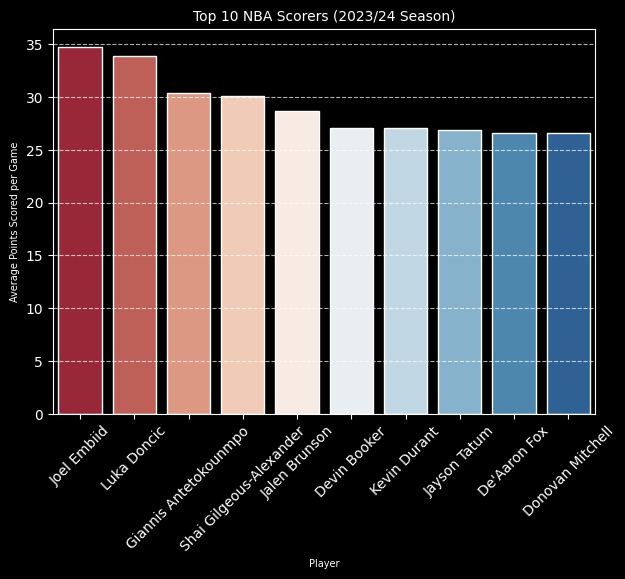

In [24]:
# Fetching the top 10 players by average points per game
top_scorers = nba_stats.nlargest(10, 'PTS')

# Getting the names and average points of the 'top_scorers'
names = top_scorers['Player']
average_points = top_scorers['PTS']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library, X axis contains player names, Y axis contains the average points scored per game
colors = sns.color_palette("RdBu", n_colors=10)
sns.barplot(x=names, y=average_points, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 NBA Scorers (2023/24 Season)', fontsize=10)
plt.xlabel('Player', fontsize=7)
plt.ylabel('Average Points Scored per Game', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.show()

C:\Users\wills\AppData\Local\Temp\ipykernel_229916\2081036748.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=average_assists, palette=colors, edgecolor='white')


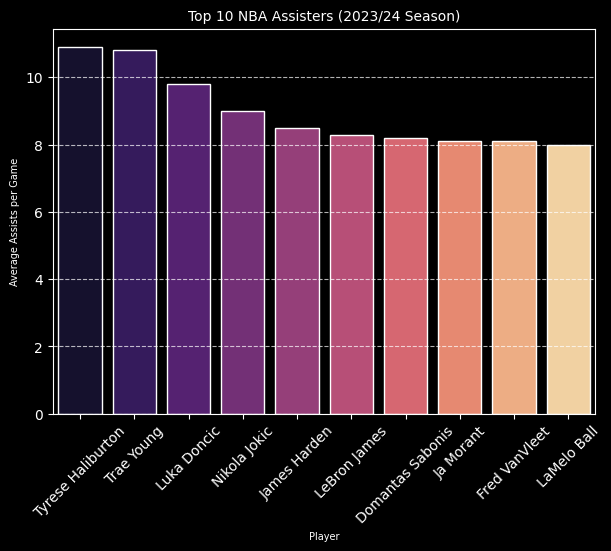

In [10]:
# Fetching the top 10 players by average assists per game
top_assisters = nba_stats.nlargest(10, 'AST')

# Getting the names and average points of the 'top_assisters'
names = top_assisters['Player']
average_assists = top_assisters['AST']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library
colors = sns.color_palette("magma", n_colors=10)
sns.barplot(x=names, y=average_assists, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 NBA Assisters (2023/24 Season)', fontsize=10)
plt.xlabel('Player', fontsize=7)
plt.ylabel('Average Assists per Game', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.show()

C:\Users\wills\AppData\Local\Temp\ipykernel_229916\2607666456.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=average_rebounds, palette=colors, edgecolor='white')


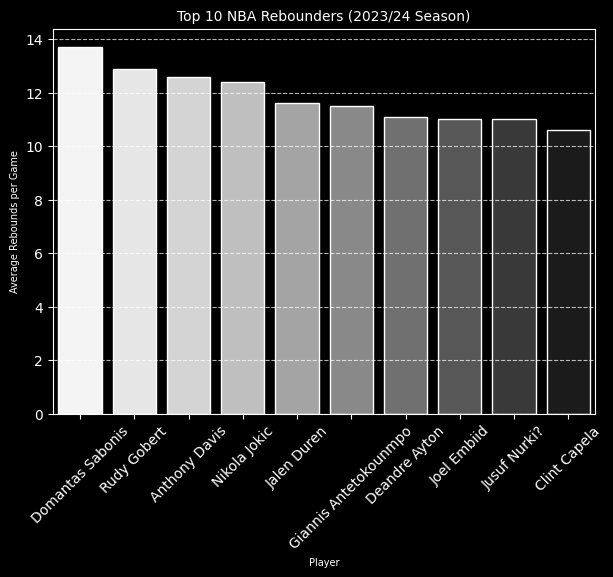

In [11]:
# Fetching the top 10 players by average rebounds per game
top_rebounders = nba_stats.nlargest(10, 'TRB')

# Getting the names and average points of the 'top_rebounders'
names = top_rebounders['Player']
average_rebounds = top_rebounders['TRB']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library
colors = sns.color_palette("Greys", n_colors=10)
sns.barplot(x=names, y=average_rebounds, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 NBA Rebounders (2023/24 Season)', fontsize=10)
plt.xlabel('Player', fontsize=7)
plt.ylabel('Average Rebounds per Game', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.show()

C:\Users\wills\AppData\Local\Temp\ipykernel_229916\3380138220.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=average_steals, palette=colors, edgecolor='white')


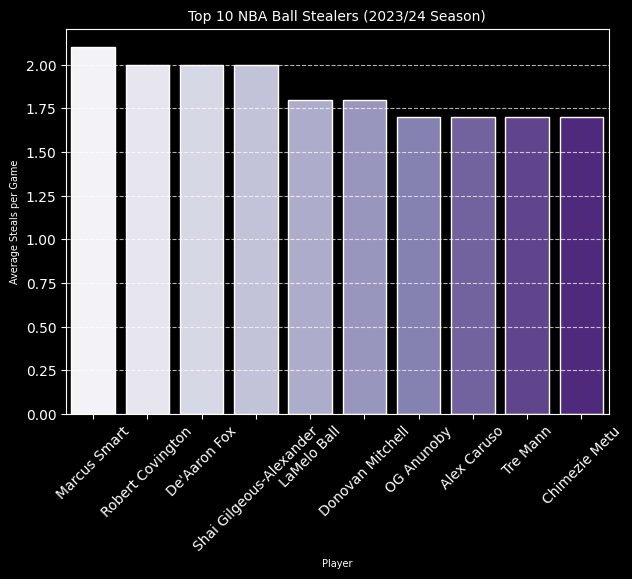

In [12]:
# Fetching the top 10 players by average steals per game
top_steals = nba_stats.nlargest(10, 'STL')

# Getting the names and average points of the 'top_steals'
names = top_steals['Player']
average_steals = top_steals['STL']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library
colors = sns.color_palette("Purples", n_colors=10)
sns.barplot(x=names, y=average_steals, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 NBA Ball Stealers (2023/24 Season)', fontsize=10)
plt.xlabel('Player', fontsize=7)
plt.ylabel('Average Steals per Game', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.show()

C:\Users\wills\AppData\Local\Temp\ipykernel_229916\852274221.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=average_2PFG, palette=colors, edgecolor='white')


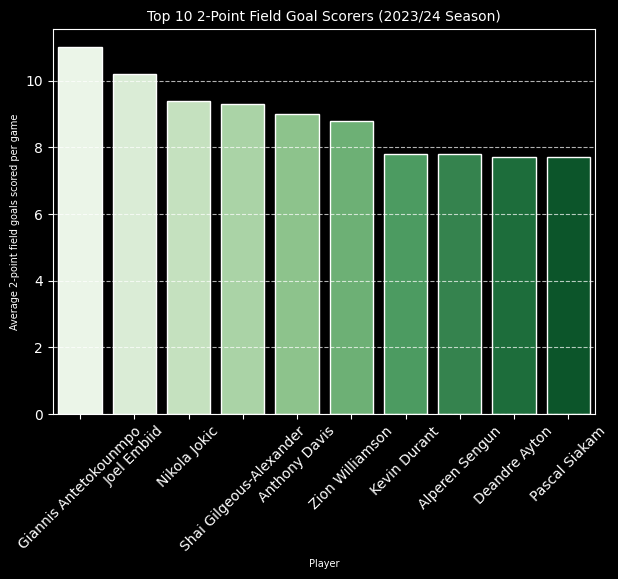

In [13]:
# Fetching the top 10 players by average 2-point field goals scored per game
top_2PFG = nba_stats.nlargest(10, '2P')

# Getting the names and average points of the 'top_2PFG'
names = top_2PFG['Player']
average_2PFG = top_2PFG['2P']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library
colors = sns.color_palette("Greens", n_colors=10)
sns.barplot(x=names, y=average_2PFG, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 2-Point Field Goal Scorers (2023/24 Season)', fontsize=10)
plt.xlabel('Player', fontsize=7)
plt.ylabel('Average 2-point field goals scored per game', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.show()

C:\Users\wills\AppData\Local\Temp\ipykernel_229916\4164601345.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=average_3PFG, palette=colors, edgecolor='white')


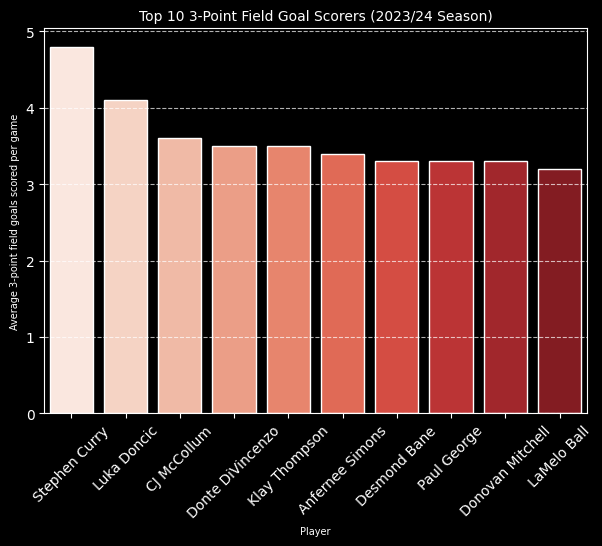

In [14]:
# Fetching the top 10 players by average 3-point field goals scored per game
top_3PFG = nba_stats.nlargest(10, '3P')

# Getting the names and average points of the 'top_3PFG'
names = top_3PFG['Player']
average_3PFG = top_3PFG['3P']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library
colors = sns.color_palette("Reds", n_colors=10)
sns.barplot(x=names, y=average_3PFG, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 3-Point Field Goal Scorers (2023/24 Season)', fontsize=10)
plt.xlabel('Player', fontsize=7)
plt.ylabel('Average 3-point field goals scored per game', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.show()

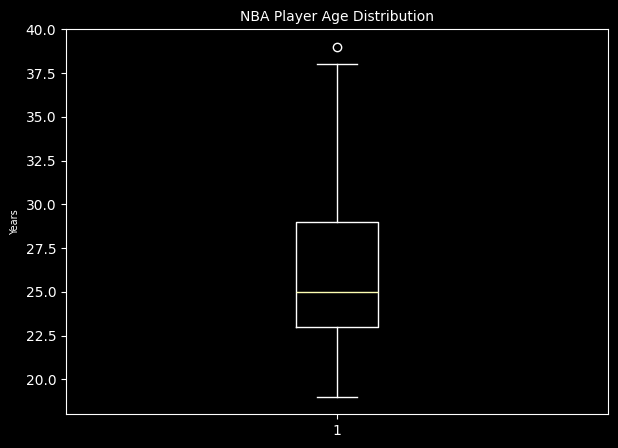

In [15]:
# Fetching the ages of all NBA players
ages = nba_stats['Age']

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Labelling and customising the graph
plt.boxplot(ages)
plt.title('NBA Player Age Distribution', fontsize=10)
plt.ylabel('Years', fontsize=7)
plt.style.use('dark_background')
plt.show()

C:\Users\wills\AppData\Local\Temp\ipykernel_229916\3550452442.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_teams.index, y=top_10_teams.values, palette=colors, edgecolor='white')


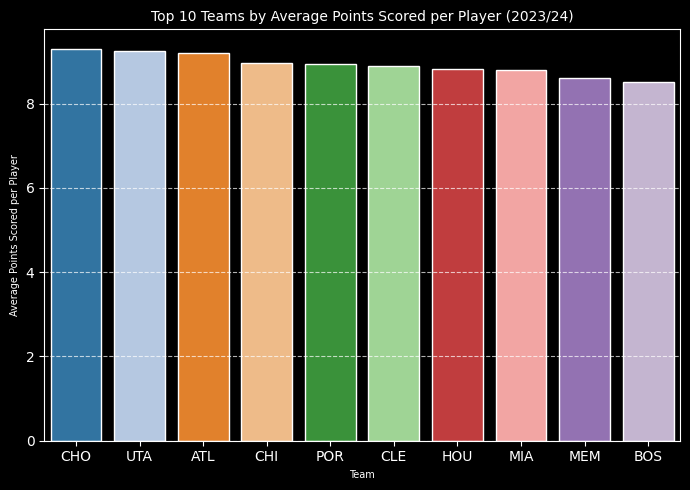

In [16]:
# Calculating the mean points scored per game for each NBA team
team_performance_pts = nba_stats.groupby('Tm')['PTS'].mean()

# Fetching the top 10 teams
top_10_teams = team_performance_pts.head(10)

# Sorting from highest to lowest
top_10_teams = team_performance_pts.sort_values(ascending=False).head(10)

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart using the Seaborn library
colors = sns.color_palette("tab20", n_colors=10)
sns.barplot(x=top_10_teams.index, y=top_10_teams.values, palette=colors, edgecolor='white')

# Labelling and customising the graph
plt.title('Top 10 Teams by Average Points Scored per Player (2023/24)', fontsize=10)
plt.xlabel('Team', fontsize=7)
plt.ylabel('Average Points Scored per Player',  fontsize=7)
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background') 
plt.tight_layout()
plt.show()

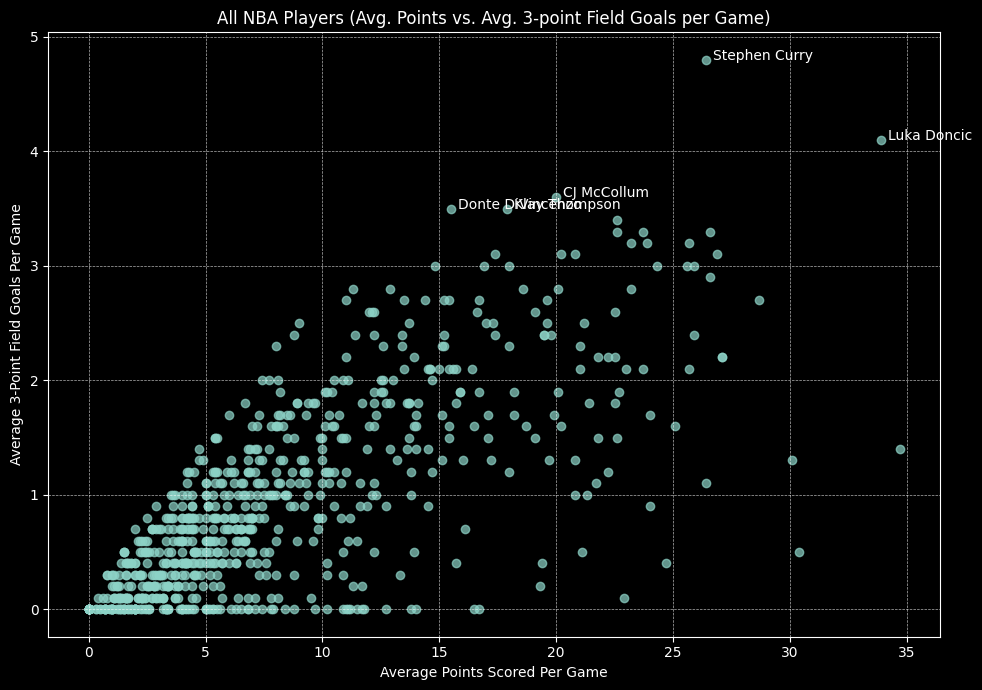

In [17]:
# Fetching the top 5 players with the highest Avg. 3-point Field Goals made per Game
most_3ps = nba_stats.nlargest(5, '3P')

# Setting the dimensions of the graph
plt.figure(figsize=(10, 7))

# Plotting all players in the NBA onto the graph
plt.scatter(nba_stats['PTS'], nba_stats['3P'], alpha=0.7)

# Fetching the names of players contained in 'most_3ps'
for index, row in most_3ps.iterrows():
    plt.annotate(row['Player'], (row['PTS'], row['3P']), textcoords="offset points", xytext=(5, 0), color='white')

# Labelling and customising the graph
plt.title('All NBA Players (Avg. Points vs. Avg. 3-point Field Goals per Game)', fontsize=12)
plt.xlabel('Average Points Scored Per Game', fontsize=10)
plt.ylabel('Average 3-Point Field Goals Per Game', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.7)
plt.style.use('dark_background')
plt.tight_layout()
plt.show()

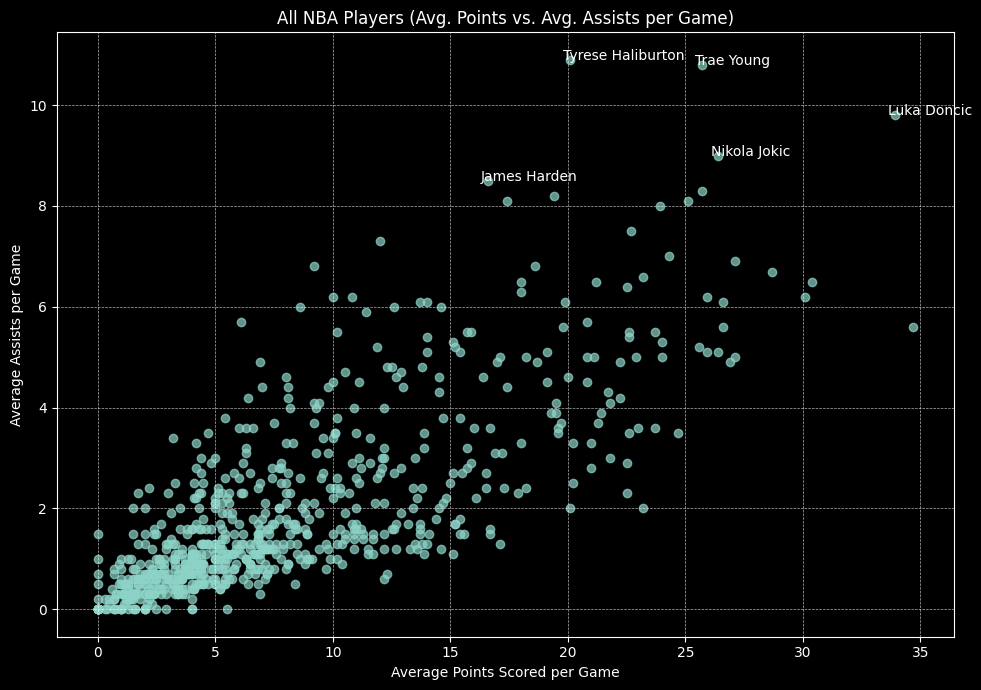

In [18]:
# Fetching the top 5 players with the highest average assists per game
top_assisters = nba_stats.nlargest(5, 'AST')

# Setting the dimensions of the graph
plt.figure(figsize=(10, 7))

# Plotting all players in the NBA onto the graph
plt.scatter(nba_stats['PTS'], nba_stats['AST'], alpha=0.7)

# Fetching the names of players contained in 'top_assisters'
for index, row in top_assisters.iterrows():
    plt.annotate(row['Player'], (row['PTS'], row['AST']),textcoords="offset points", xytext=(-5, 0), color='white')

# Labelling and customising the graph
plt.title('All NBA Players (Avg. Points vs. Avg. Assists per Game)')
plt.xlabel('Average Points Scored per Game')
plt.ylabel('Average Assists per Game')
plt.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.7)
plt.style.use('dark_background')
plt.tight_layout()
plt.show()

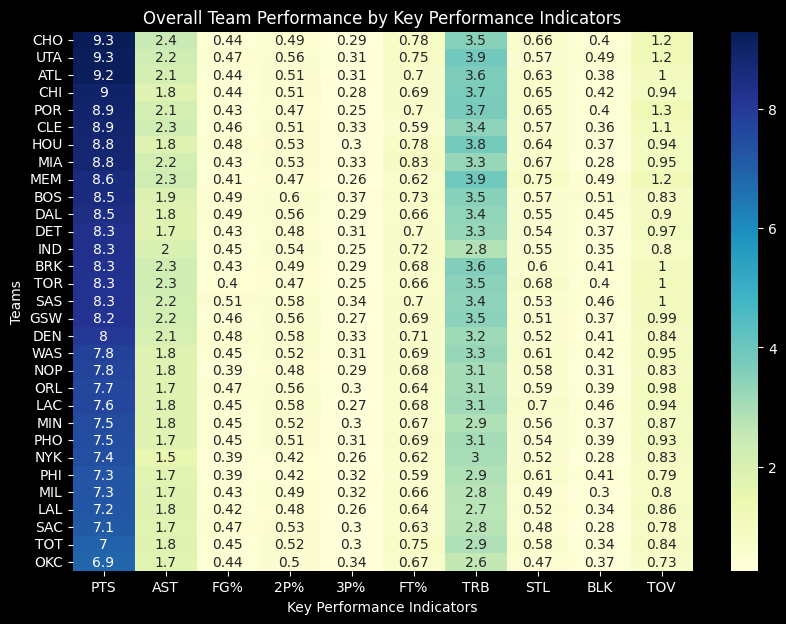

In [19]:
# The key performance indicators
attributes = ['PTS', 'AST', 'FG%', '2P%', '3P%', 'FT%', 'TRB', 'STL', 'BLK','TOV']

# Calculating the means of all performance indicators
organisation= nba_stats[attributes + ['Tm']].groupby('Tm').mean()

# Sorting the teams into order, via points performance
sort = organisation.sort_values(by='PTS', ascending=False)

# Setting the dimensions of the graph
plt.figure(figsize=(10, 7))

# Plotting the heat map
sns.heatmap(organisation.sort_values(by='PTS', ascending=False), annot=True, cmap='YlGnBu')

# Labelling and customising the graph
plt.title('Overall Team Performance by Key Performance Indicators')
plt.xlabel('Key Performance Indicators')
plt.ylabel('Teams')
plt.show()

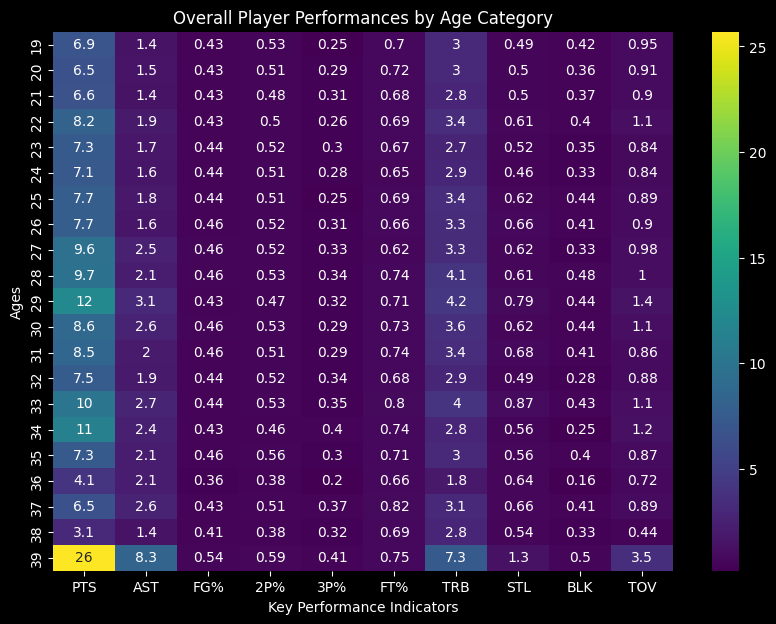

In [20]:
# The key performance indicators
attributes = ['PTS', 'AST', 'FG%', '2P%', '3P%', 'FT%', 'TRB', 'STL', 'BLK','TOV']

# Calculating the means of all performance indicators
organisation= nba_stats[attributes + ['Age']].groupby('Age').mean()

# Setting the dimensions of the graph
plt.figure(figsize=(10, 7))

# Plotting the heat map
sns.heatmap(organisation, annot=True, cmap='viridis')

# Labelling and customising the graph
plt.title('Overall Player Performances by Age Category')
plt.xlabel('Key Performance Indicators')
plt.ylabel('Ages')
plt.show()

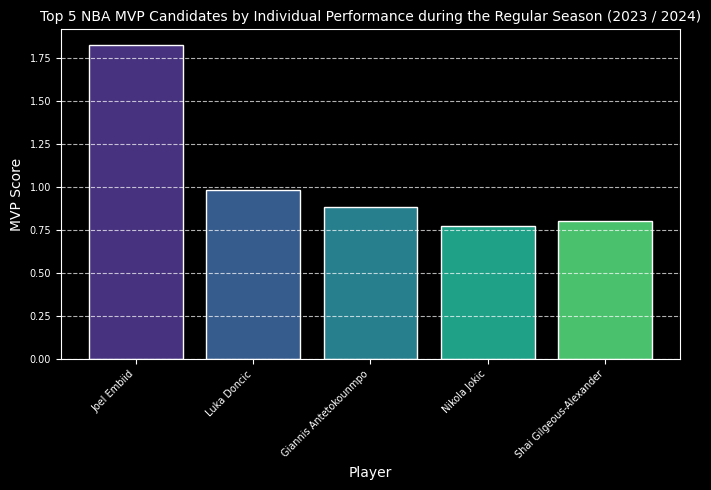

In [21]:
# Calculate MVP Score
nba_stats['MVP_Score'] = (nba_stats['PTS'] + nba_stats['AST'] + nba_stats['ORB'] + nba_stats['DRB'] + 
                          nba_stats['STL'] + nba_stats['BLK'] + nba_stats['2P'] + nba_stats['3P'] + 
                          nba_stats['FT'] + nba_stats['2P%'] + nba_stats['3P%'] + nba_stats['FT%'] - 
                          nba_stats['TOV'] - nba_stats['PF'])

# Fetch the top 5 players in the NBA, ranked by MVP scores
top_candidates = nba_stats.sort_values(by='MVP_Score', ascending=False).head(5)

# Calculate MVP Score per game
top_candidates_per_game = top_candidates.copy()
top_candidates_per_game['MVP_Score'] = top_candidates_per_game['MVP_Score'] / top_candidates_per_game['G']

sns.set_palette("viridis")

# Setting the dimensions of the graph
plt.figure(figsize=(7, 5))

# Creating a bar chart
plt.bar(top_candidates_per_game['Player'], top_candidates_per_game['MVP_Score'], color=sns.color_palette(), linewidth=1, edgecolor='white')

# Labelling and customising the graph
plt.xlabel('Player')
plt.ylabel('MVP Score')
plt.title('Top 5 NBA MVP Candidates by Individual Performance during the Regular Season (2023 / 2024)', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(fontsize=7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('dark_background')
plt.tight_layout()
plt.show()

In [22]:
# Weightage for wins and losses
win_weightage = 40
loss_weightage = -50  

# Calculating every NBA team's win rate
nba_team_stats['Win_Pct'] = nba_team_stats['Wins'] / (nba_team_stats['Wins'] + nba_team_stats['Losses'])

# Merge both dataframes together
merged_stats = nba_stats.merge(nba_team_stats[['Tm', 'Win_Pct']], how='left', on='Tm')
merged_stats['MVP_Score'] = (merged_stats['PTS'] + merged_stats['AST'] + merged_stats['ORB'] + merged_stats['DRB'] +
                              merged_stats['STL'] + merged_stats['BLK'] + merged_stats['2P'] + merged_stats['3P'] +
                              merged_stats['FT'] + merged_stats['2P%'] + merged_stats['3P%'] + merged_stats['FT%'] -
                              merged_stats['TOV'] - merged_stats['PF'])

# Taking into account the overall team performance into calculating who the MVP of this season will be
merged_stats['MVP_Score'] += (merged_stats['Win_Pct'] * win_weightage) + ((1 - merged_stats['Win_Pct']) * loss_weightage)

# Fetching the top 5 candidates for the season's MVP (not taking into account voting and opinion polling)
top_5_players = merged_stats.sort_values(by='MVP_Score', ascending=False).head(5)

# Printing the top 5 players of the season
print("Top 5 players based on MVP Score:")
for index, row in top_5_players.iterrows():
    print(f"{index + 1}. {row['Player']} - MVP Score: {row['MVP_Score']:.2f}")

Top 5 players based on MVP Score:
341. Nikola Jokic - MVP Score: 73.86
631. Jayson Tatum - MVP Score: 73.69
172. Luka Doncic - MVP Score: 73.62
187. Joel Embiid - MVP Score: 72.71
236. Shai Gilgeous-Alexander - MVP Score: 72.66


In [23]:
# Predicting the season's MVP (2023 / 2024) using Machine Learning

# identifying the indexes of rows that don’t have any missing values
indexes_to_keep = merged_stats.dropna().index 

# Using the following parameters to determine who the MVP of the season is (not considering voting and other advanced metrics)
X = merged_stats[['PTS', 'AST', 'ORB', 'DRB', 'STL', 'BLK', '2P', '3P', 'FT', '2P%', '3P%', 'FT%', 'TOV', 'PF', 'Win_Pct']].loc[indexes_to_keep]
y = merged_stats['MVP_Score'].loc[indexes_to_keep]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=50)

# Create and train Random Forest Regressor model
model = RandomForestRegressor(n_estimators=40, random_state=100)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error =", mse)
print("R² (coefficient of determination) =", r2) 
print()

# Predict MVP scores for all players
all_predictions = model.predict(merged_stats[['PTS', 'AST', 'ORB', 'DRB', 'STL', 'BLK', '2P', '3P', 'FT', '2P%', '3P%', 'FT%', 'TOV', 'PF', 'Win_Pct']])

# Printing the MVP
player_with_highest_score_index = all_predictions.argmax()
print("Predicted MVP of the 2023 / 2024 Regular Season:", merged_stats.loc[player_with_highest_score_index, 'Player'])

Mean Squared Error = 1.8634614175433177
R² (coefficient of determination) = 0.9897132723512325

Predicted MVP of the 2023 / 2024 Regular Season: Nikola Jokic
